In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import shap
import warnings
warnings.filterwarnings("ignore")

In [123]:
#SECTION 2
#load the datasets
df = pd.read_csv('diabetes.csv')

In [126]:
# Section 2: Data Understanding and Preprocessing

# Dataset Description
df.info()
print("Dataset Description:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")
print("First 5 rows of the dataset:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Dataset Description:
Number of rows: 768
Number of columns: 9
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
# 2. Encoding Categorical Variables
# No categorical variables present in the dataset.

In [41]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               564 non-null    int64  
 1   Glucose                   564 non-null    int64  
 2   BloodPressure             564 non-null    int64  
 3   SkinThickness             564 non-null    int64  
 4   Insulin                   564 non-null    int64  
 5   BMI                       564 non-null    float64
 6   DiabetesPedigreeFunction  564 non-null    float64
 7   Age                       564 non-null    int64  
 8   Outcome                   564 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 44.1 KB


In [10]:
# Data Quality Analysis
print("Data Quality Analysis:")
print("Missing values in each column:")
print(df.isnull().sum())

Data Quality Analysis:
Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [42]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
#For easy
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [44]:
# including the number of rows
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 564
Number of columns: 9


In [53]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [46]:
# Now let's check that if our dataset have null values or not
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False


In [59]:
# Data Pre-processing
## Handling Missing Values
diabetes_data.replace([np.inf, -np.inf], np.nan, inplace=True)

diabetes_data.dropna(inplace=True)

In [57]:
# Outlier treatment using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(outliers.sum())

Pregnancies                 0
Glucose                     5
BloodPressure               3
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [54]:
# Normalization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

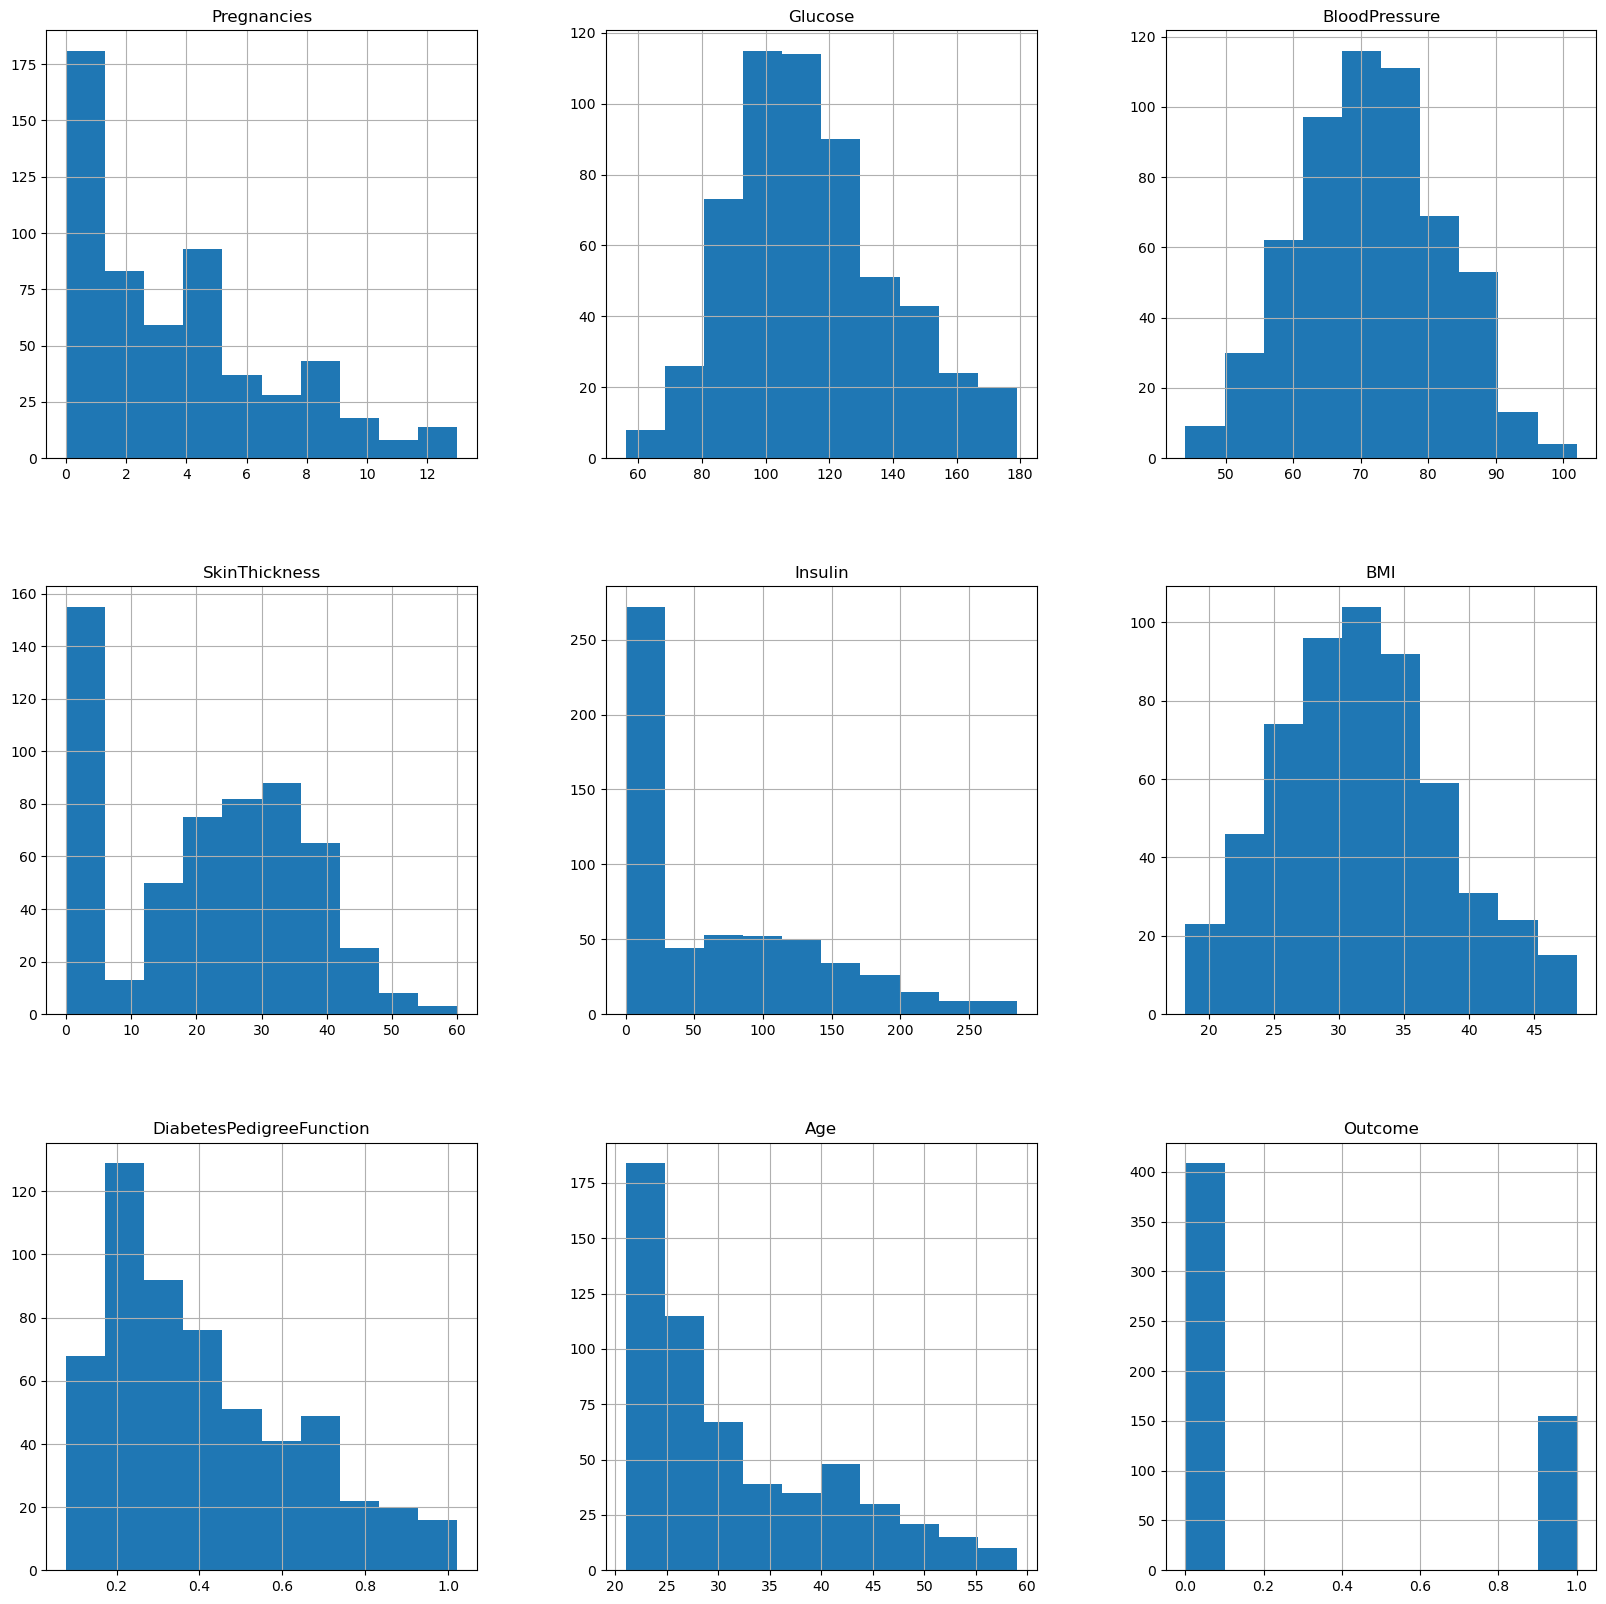

In [61]:
# Data Visualization
p = df.hist(figsize=(20, 20))

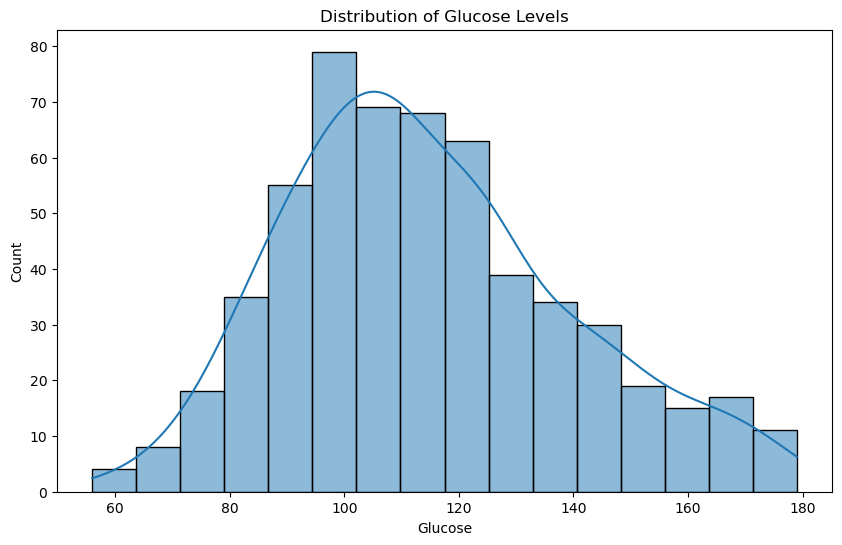

In [63]:
#Distribution of Glucose Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()

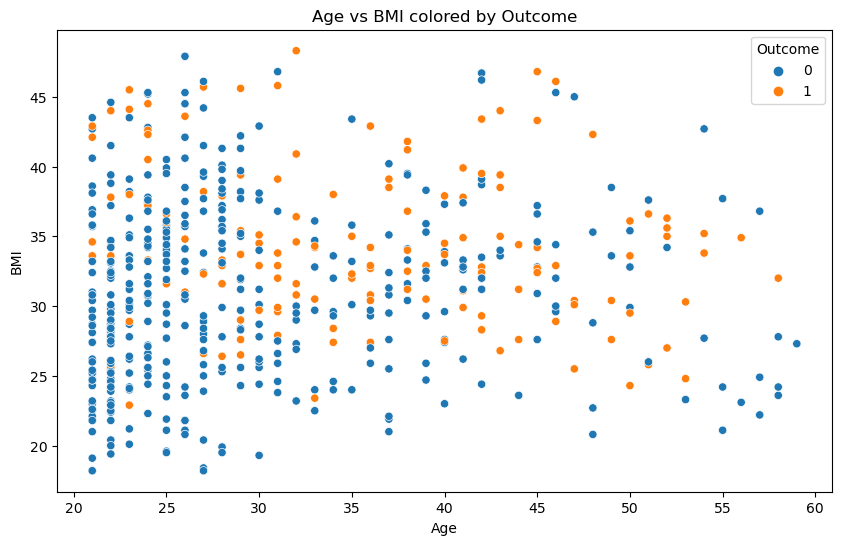

In [62]:
# Age vs BMI colored by Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Age vs BMI colored by Outcome')
plt.show()

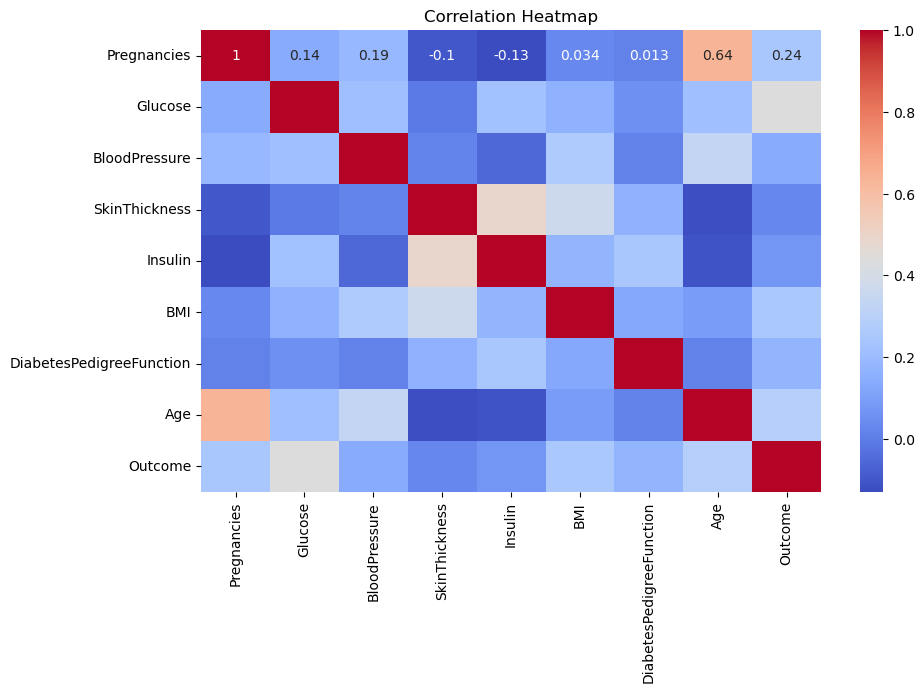

In [64]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

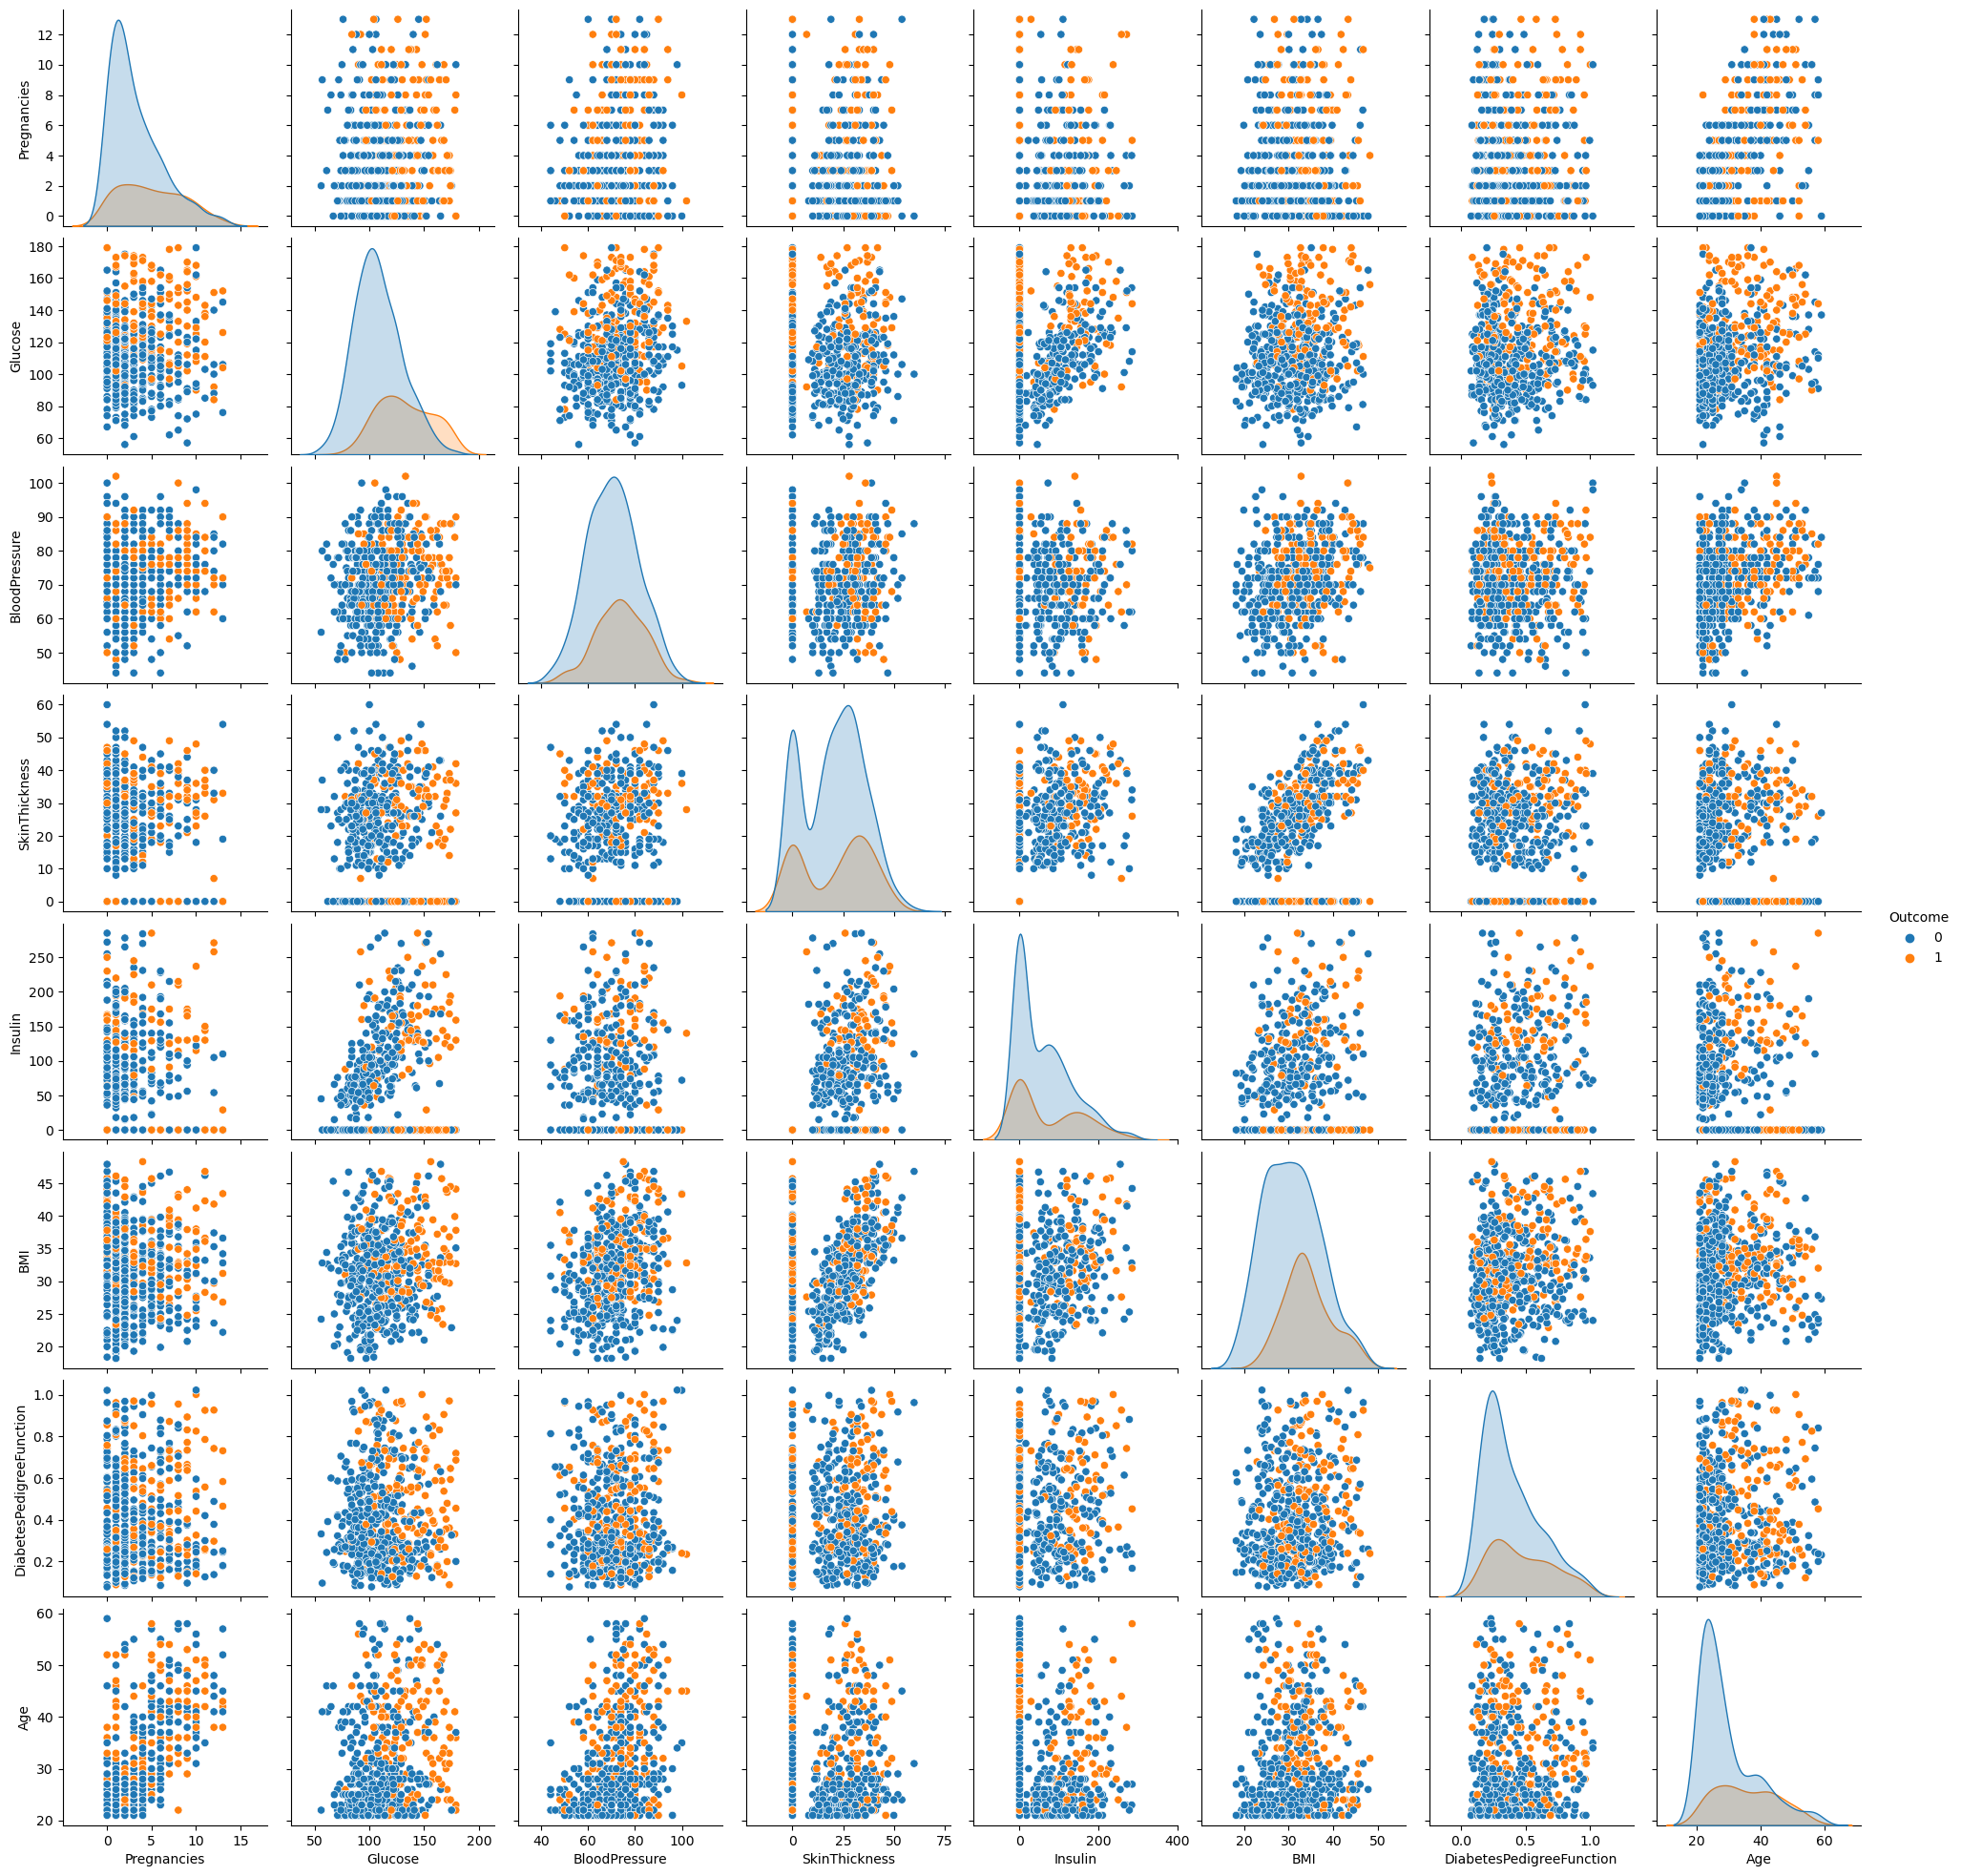

In [70]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

In [71]:
#Statistical Analysis
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   564.000000  564.000000     564.000000     564.000000  564.000000   
mean      3.695035  114.606383      71.381206      20.570922   62.792553   
std       3.235446   24.927555      10.864010      15.233888   73.813970   
min       0.000000   56.000000      44.000000       0.000000    0.000000   
25%       1.000000   97.000000      64.000000       0.000000    0.000000   
50%       3.000000  111.000000      72.000000      23.000000   40.500000   
75%       6.000000  129.000000      78.000000      32.000000  115.000000   
max      13.000000  179.000000     102.000000      60.000000  285.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  564.000000                564.000000  564.000000  564.000000  
mean    31.716667                  0.411645   31.228723    0.274823  
std      6.306973                  0.227088    9.635036    0.446821  
min     18.200000                  

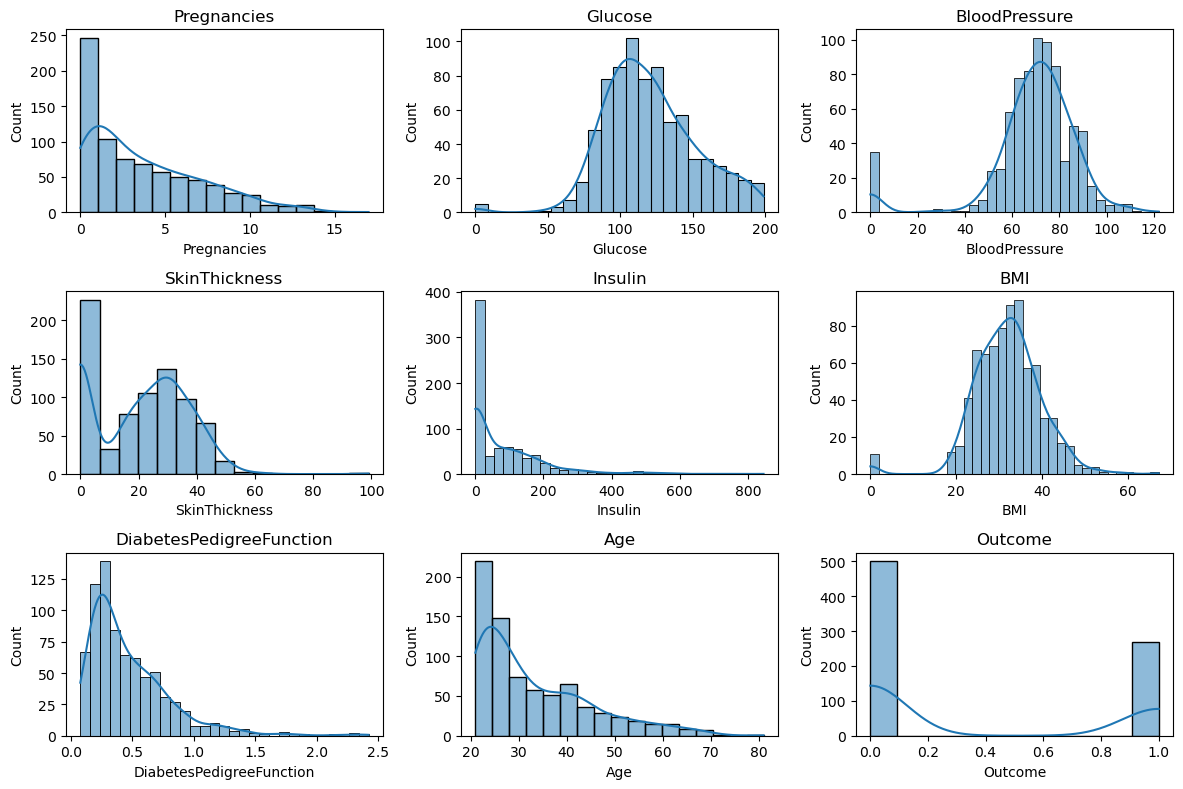

In [72]:
# Visualize distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(diabetes_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diabetes_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

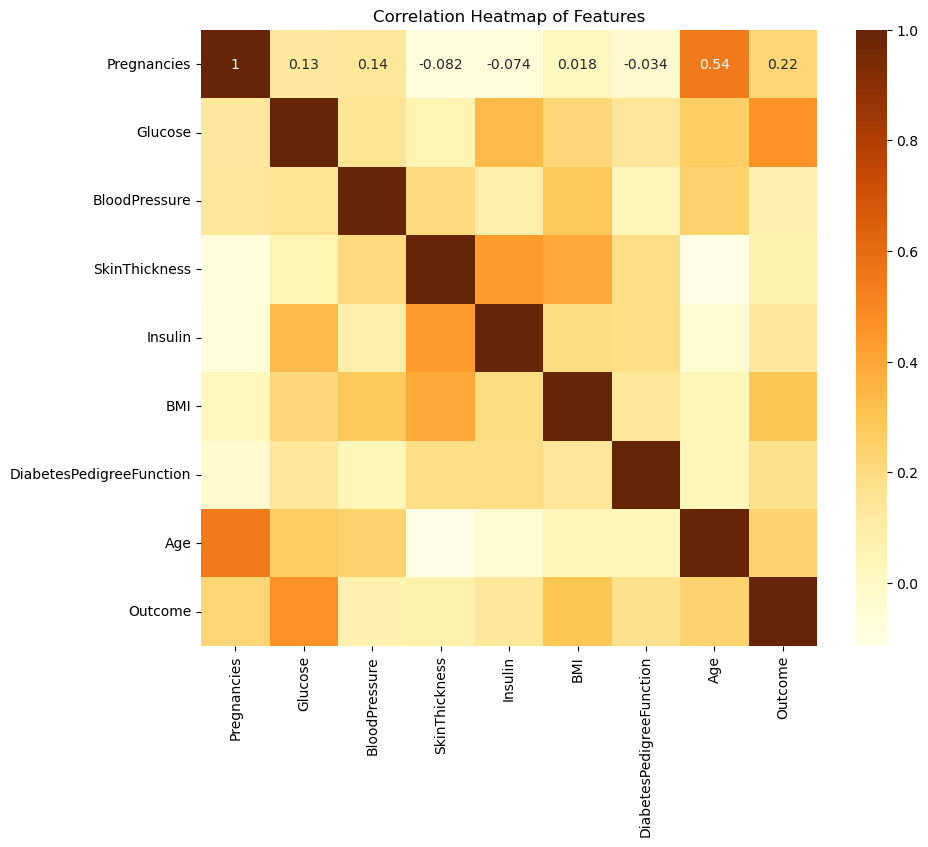

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [73]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

print(correlation_matrix.iloc[:-1, -1].sort_values(ascending=False))

In [28]:
# Statistical Analysis
print("Summary Statistics:")
print(df.describe())

print("Correlation Coefficients:")
print(df.corr())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   604.000000  604.000000     604.000000     604.000000  604.000000   
mean      3.736755  117.236755      71.733444      20.523179   63.894040   
std       3.225403   27.696745      10.997669      15.209356   76.332575   
min       0.000000   44.000000      44.000000       0.000000    0.000000   
25%       1.000000   98.000000      64.000000       0.000000    0.000000   
50%       3.000000  112.000000      72.000000      23.000000   37.500000   
75%       6.000000  133.000000      80.000000      32.000000  115.000000   
max      13.000000  194.000000     104.000000      60.000000  300.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  604.000000                604.000000  604.000000  604.000000  
mean    31.787748                  0.416280   32.124172    0.293046  
std      6.278275                  0.231902   10.602081    0.455537  
min     18.2000

In [108]:
# Section 4: Model Development
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Algorithm Selection and Training
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Set probability=True for ROC-AUC calculation
}

params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [10, 50, 100]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_estimators = {}
cv_results = {}

for model_name in models:
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    cv_results[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {cv_results[model_name]}\n")

Best parameters for Logistic Regression: {'C': 1}
Best cross-validation accuracy for Logistic Regression: 0.7703851792616286

Best parameters for Decision Tree: {'max_depth': 20}
Best cross-validation accuracy for Decision Tree: 0.7344928695188591

Best parameters for Random Forest: {'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.7719978675196588



KeyboardInterrupt: 

In [77]:
#Logistic Regression
# Initialize and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Print performance metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [78]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_dt = decision_tree_model.predict(X_test)

# Print performance metrics
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[74 25]
 [14 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



In [79]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = random_forest_model.predict(X_test)

# Print performance metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[78 21]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [80]:
#SVM
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = svm_model.predict(X_test)

# Print performance metrics
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM:
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [81]:
#SECTION 4:

#Data splitting

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [82]:
#Model training and hyper parameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [112]:
param_dist_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
best_estimators['Random Forest'] = best_rf  # Add the best random forest model to best_estimators

print("Best parameters for Random Forest (RandomizedSearchCV):")
print(random_search_rf.best_params_)

Best parameters for Random Forest (RandomizedSearchCV):
{'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 20}


In [88]:
#Cross-validation

skf = StratifiedKFold(n_splits=5)
cv_scores_lr = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=skf)
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X_train, y_train, cv=skf)

Performance Metrics on Test Set:
Model: Logistic Regression
Accuracy: 0.7467532467532467
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.8128558310376492



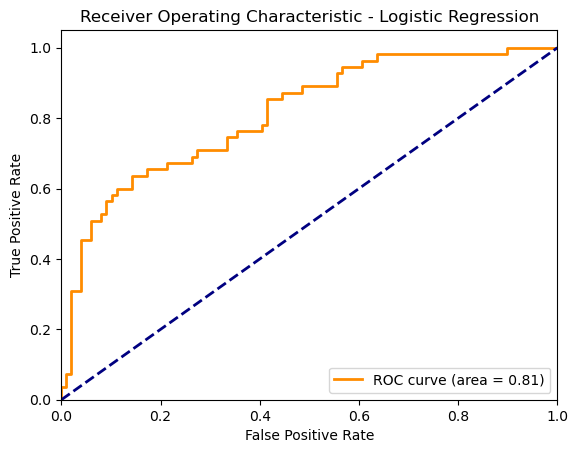

Model: Decision Tree
Accuracy: 0.7532467532467533
Confusion Matrix:
[[75 24]
 [14 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

ROC-AUC: 0.7515151515151516



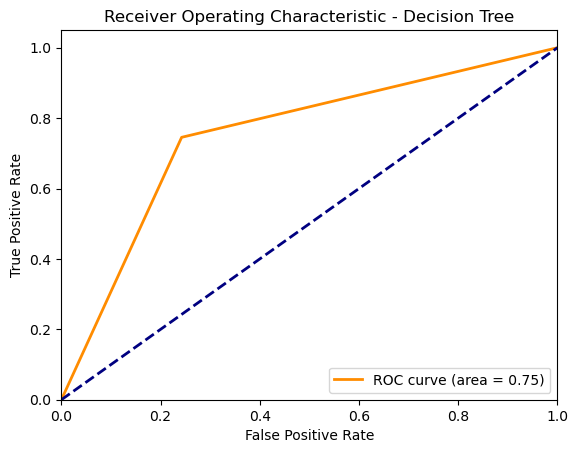

Model: Random Forest
Accuracy: 0.7272727272727273
Confusion Matrix:
[[74 25]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

ROC-AUC: 0.8066115702479338



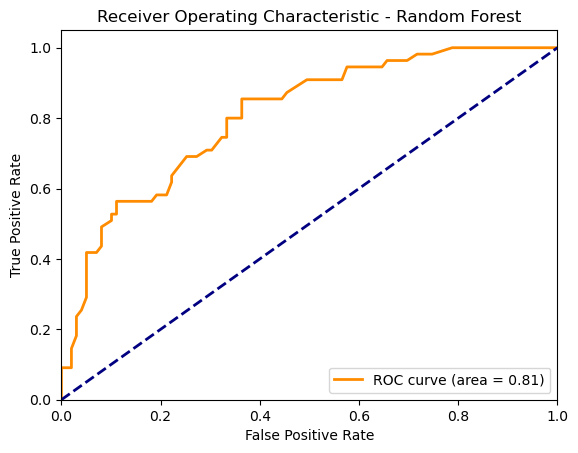

In [122]:
# Model Evaluation
print("Performance Metrics on Test Set:")
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class for ROC-AUC

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"ROC-AUC: {roc_auc}\n")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [119]:
# Section 6: Model Interpretation

# Feature Importance using SHAP

# Use Logistic Regression model for SHAP interpretation
explainer = shap.LinearExplainer(best_estimators['Logistic Regression'], X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

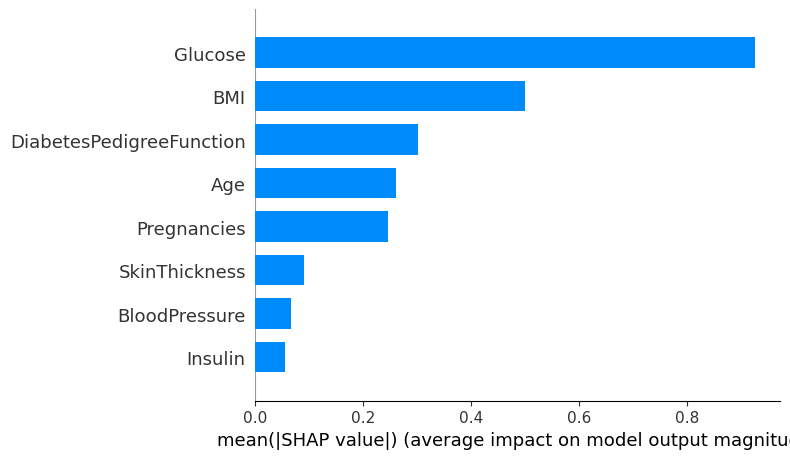

In [117]:
# Plot the SHAP summary (bar plot)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

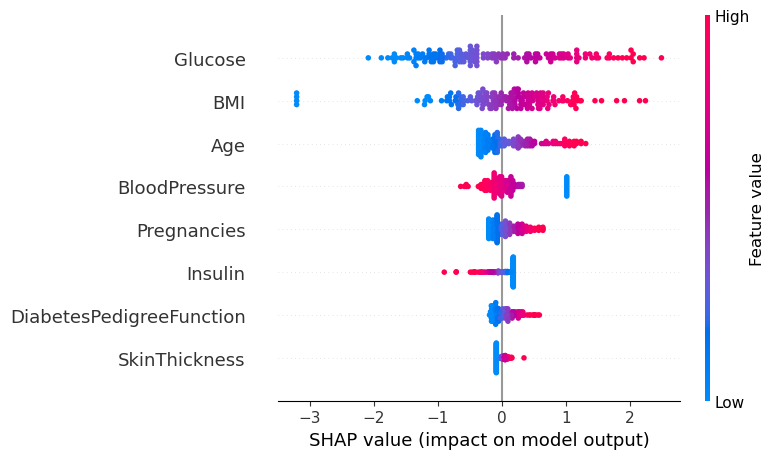

In [120]:
# Plot the SHAP summary (beeswarm plot)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)